In [1]:
# 모듈 임포트

import os
import numpy as np
import dlib
import face_recognition
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import math

print('done')

done


# 사진 모으기

In [2]:
# 경로내 리스트 확인

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/pics' # 기준경로
file_list = os.listdir(dir_path) # 기준경로 내 파일명 리스트
print ("file_list: {}".format(file_list))


file_list: ['수지.jpg', '슬기.jpg', '유리.jpg', '트와이스다현.jpeg', '화사.jpg', '신비.jpg', '리아.jpg', '트와이스쯔위.jpg', '아이유.jpg', '러블리즈지수.jpeg', '우기.jpg', '이효리.jpg', '지호.jpg', 'bibi1.jpg', '채연.jpg', '아린.jpg', '케이.jpg', '잇지예지.jpeg', '장원영.jpeg', '윤아.jpg', '나인뮤지스경리.jpg', '아이즈원민주.jpg', '티파니.jpg', '승희.jpeg', '강민경.jpg', '조이.jpg', '아이즈원조유리.jpeg', '비니.jpg', '전소미.jpg', '트와이스사나.jpg', '잇지유나.jpg', 'me2.jpg', '김유정.jpg', '레드벨벳웬디.jpg', '트와이스나연.jpg', '공효진.jpg', '서현진.jpg', '한효주.jpg', '지수.jpg', '아이즈원김채원.jpg', '박나래.jpeg', '박보영.jpg', '러블리즈예인.jpg', '문별.jpg', '유아.jpg', 'me1.jpg', '크리스탈.jpg', '솔라.jpg', '손예진.jpeg', 'bibi2.jpg', '트와이스모모.jpeg', '제니.jpg', '리사.jpg', '아이린.jpeg', '김고은.jpeg', '트와이스정연.jpg', '김남주.jpeg', '민니.jpg', '강미나.jpg', '미미.jpg', '레인보우재경.jpg', '도아.jpeg', '로제.jpg', '트와이스미나.jpg', '여자아이들수진.jpeg', '태연.jpg', '류진.jpg', '사쿠라.jpg', '박소담.jpeg']


# 얼굴 영역 자르기

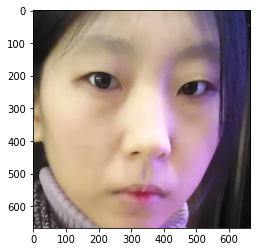

In [3]:
# 얼굴 잘라내는 함수 만들기

def get_cropped_face(image_file): 
    image = face_recognition.load_image_file(image_file) # 얼굴인식
    face_locations = face_recognition.face_locations(image) # 좌표 찾아서
    a, b, c, d = face_locations[0]                        # 저장
    cropped_face = image[a:c,d:b,:] # 좌표만큼 잘라낸 사진
    
    return cropped_face # 반환


# 얼굴 영역의 임베딩 벡터 구하기

image_file = os.path.join(dir_path, 'me1.jpg') # 기준경로+파일명
cropped_me = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수

plt.imshow(cropped_me)

# 얼굴 영역 임베딩 추출하기

In [4]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(cropped_face):
    return face_recognition.face_encodings(cropped_face)

embedding = get_face_embedding(cropped_me)  # 아까 꺼낸 비비 1번 임베딩 구하기
embedding

[array([-0.07110135,  0.03816321,  0.04092727, -0.07556202, -0.12784661,
        -0.05304189, -0.0739969 , -0.12500703,  0.11402059, -0.17769581,
         0.20944867, -0.09849248, -0.16797961, -0.0073811 , -0.09885535,
         0.19648634, -0.19518839, -0.13794339, -0.06796462, -0.00881074,
         0.08913963,  0.08607312, -0.04745741,  0.00887386, -0.10805812,
        -0.29818562, -0.10195296, -0.02715556, -0.00559373, -0.06399737,
        -0.04031637,  0.09115356, -0.19060788, -0.01548186,  0.04361051,
         0.08062932, -0.00936187, -0.08266661,  0.1152219 , -0.00806553,
        -0.24781078,  0.06039391,  0.07687606,  0.22534187,  0.18067634,
        -0.00047943, -0.00181335, -0.17305675,  0.09003232, -0.14107396,
        -0.00187377,  0.13445689,  0.05785705,  0.10487809, -0.01047893,
        -0.10188339,  0.03738444,  0.10573031, -0.07825442, -0.00653863,
         0.15898989, -0.07047793,  0.00499493, -0.13071632,  0.1961218 ,
        -0.01100897, -0.14201383, -0.17740722,  0.1

# 모든 사진 임베딩 구하기

In [5]:
# images 디렉토리 안에 있는 이미지 파일의 임베딩을 구해서 dict에 담아 리턴하는 함수

def get_face_embedding_dict(dir_path):
    embedding_dict = {} # 임베딩 딕셔너리
    cropped_dict = {} # 사진 딕셔너리
    
    for file in file_list:
        img_path = os.path.join(dir_path, file) # 기준경로+파일명
        face = get_cropped_face(img_path) # 얼굴 잘라낸 사진
        embedding = get_face_embedding(face) # 을 임베딩하기
        if len(embedding) > 0:  # 제대로 임배딩 된 경우
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0] # 임베딩 딕셔너리에 담기
            cropped_dict[os.path.splitext(file)[0]] = face # 사진 딕셔너리에 사진 담기
        
    return embedding_dict, cropped_dict

embedding_dict, cropped_dict = get_face_embedding_dict(dir_path) # 기준경로 내 사진 임베딩
embedding_dict['me1']

array([-0.07110135,  0.03816321,  0.04092727, -0.07556202, -0.12784661,
       -0.05304189, -0.0739969 , -0.12500703,  0.11402059, -0.17769581,
        0.20944867, -0.09849248, -0.16797961, -0.0073811 , -0.09885535,
        0.19648634, -0.19518839, -0.13794339, -0.06796462, -0.00881074,
        0.08913963,  0.08607312, -0.04745741,  0.00887386, -0.10805812,
       -0.29818562, -0.10195296, -0.02715556, -0.00559373, -0.06399737,
       -0.04031637,  0.09115356, -0.19060788, -0.01548186,  0.04361051,
        0.08062932, -0.00936187, -0.08266661,  0.1152219 , -0.00806553,
       -0.24781078,  0.06039391,  0.07687606,  0.22534187,  0.18067634,
       -0.00047943, -0.00181335, -0.17305675,  0.09003232, -0.14107396,
       -0.00187377,  0.13445689,  0.05785705,  0.10487809, -0.01047893,
       -0.10188339,  0.03738444,  0.10573031, -0.07825442, -0.00653863,
        0.15898989, -0.07047793,  0.00499493, -0.13071632,  0.1961218 ,
       -0.01100897, -0.14201383, -0.17740722,  0.1004476 , -0.14

# 같은 사람 사진으로 비교

In [6]:
# 인자로 파일명의 사람 이름 2개를 받아서,
# 두 사람의 얼굴 임베딩 사이의 거리(L2 distance (ord=2))를 구하는 함수

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('me1', 'me2')


0.26161046820846556

# 함수 만들어서 비교

In [7]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

print('done')

done


In [8]:
# 순위별로 이름 출력

def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
        # 거리가 작은 순서대로 정렬
    
    for i in range(top+2): # 위에서부터 7개를 꺼내는데
        if 0 <= i <= 1:   # 첫번째 두번째는 자기 자신일 것이므로 제외 
            continue
        if sorted_faces[i]:# 이름:정렬된 순서대로 꺼내기, 거리: 꺼낸 이름으로 거리구하기
            print(f'순위 {i-1}) 이름: {sorted_faces[i][0]:　^6}, 거리: {sort_key_func(sorted_faces[i][0])}')
            # 줄 맞추고 싶은데 한글이라서 정렬이 잘 안 되길래
            # 특수문자 전각공백으로 공백을 채워버림
            
    return sorted_faces

            
# 비비와 가장 닮은 사람은 누굴까요?
sorted_faces = get_nearest_face('me1')

순위 1) 이름: 러블리즈예인, 거리: 0.3700468084931947
순위 2) 이름: 　　태연　　, 거리: 0.3764005895274341
순위 3) 이름: 트와이스사나, 거리: 0.377819784090965
순위 4) 이름: 　강미나　　, 거리: 0.3785291896244249
순위 5) 이름: 　아이유　　, 거리: 0.38247684336136023


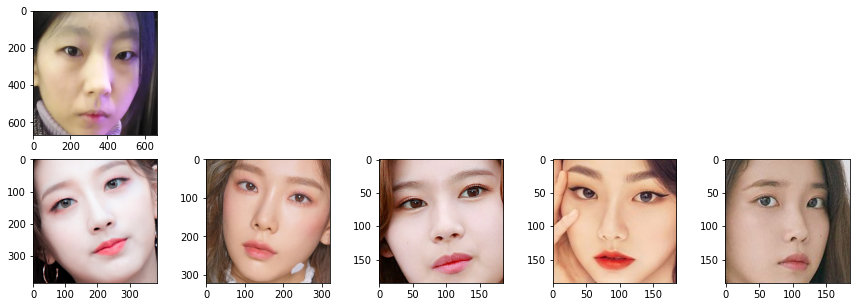

In [9]:
# 순위에 맞는 이미지 출력
def get_nearest_face_images(sorted_faces, top=5):
    fig = plt.figure(figsize=(15, 5))
    fig.add_subplot(2, top, 1)
    plt.imshow(cropped_dict[sorted_faces[0][0]]) # 비비1번 제일 위에
    for i in range(2, top+2):
        fig.add_subplot(2, top, i+4) #사진은 정렬된 이름순으로 딕셔너리에서 꺼냄
        plt.imshow(cropped_dict[sorted_faces[i][0]])
        
# 순위에 따른 이미지 출력
get_nearest_face_images(sorted_faces)

# 다양한 시각화 시도

In [10]:
# 모델 불러오기

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# 얼굴 인식 함수 선언
detector_hog = dlib.get_frontal_face_detector()

print('done')

done


## 기준이 될 사진을 리사이징

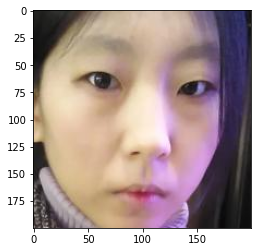

In [11]:
pil_me = Image.fromarray(cropped_me).resize((200,200))
pil_me.save('zero.jpg')
me_brg = cv2.imread('zero.jpg')
me_show = me_brg.copy()
me_rgb = cv2.cvtColor(me_brg, cv2.COLOR_BGR2RGB)
plt.imshow(me_rgb)

## 랜드마크 찾기

68


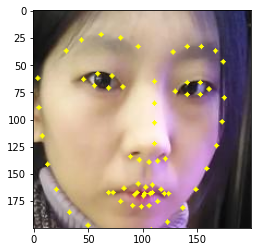

In [12]:
# 얼굴 인식하기
dlib_rects_me = detector_hog(me_rgb, 1)

list_landmarks_me = []
for dlib_rect in dlib_rects_me:
    points = landmark_predictor(me_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks_me.append(list_points)

print(len(list_landmarks_me[0]))

for landmark in list_landmarks_me:
    for idx, point in enumerate(list_points):
        cv2.circle(me_show, point, 2, (0, 255, 255), -1)
list_me = [landmark[39],landmark[42], landmark[33]] # 랜드마크 기준점 잡기
pts_me = np.float32(list_me)

me_temp = cv2.cvtColor(me_show, cv2.COLOR_BGR2RGB)
plt.imshow(me_temp)
plt.show()

## 위와 같은 과정을 함수로 만들기

In [13]:
# 랜드마크 찾는 함수 만들기
def find_landmarks(temp_rgb): 
    dlib_rects_temp = detector_hog(temp_rgb, 1) # 얼굴 찾는 함수
    list_landmarks_temp = [] # 랜드마크 점 찍기
    for dlip_rect in dlib_rects_temp: # 각 점들을 리스트에 담기
        points = landmark_predictor(temp_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks_temp.append(list_points)
        
    return list_landmarks_temp # 점이 들어있는 리스트 반환

# 랜드마크를 기준으로 얼굴 회전 후 블랜딩하는 함수
def img_blending(sorted_faces):
    for i in range(7):
        if 0 <= i <= 1: # 첫번째와 두번째는 자기자신이므로 제외
            continue
        if sorted_faces[i]:
            temp_img = Image.fromarray(cropped_dict[sorted_faces[i][0]]).resize((200,200))
                # ndarray인 i번째 이미지를 를 pil image로 변환
            temp_img.save('temp.jpg')
                # 변환해서 저장
            temp_brg = cv2.imread('temp.jpg')
            temp_show = temp_brg.copy()
            temp_rgb = cv2.cvtColor(temp_brg, cv2.COLOR_BGR2RGB)
            
            list_landmarks_temp = find_landmarks(temp_rgb)
                # i번째 이미지의 랜드마크 포인트가 들어있는 리스트 저장
            
            for landmark in list_landmarks_temp: # i번째 이미지마다 point 확인
                for idx, point in enumerate(list_points):
                    cv2.circle(temp_show, point, 2, (0, 255, 255), -1)
            
            list_temp = [landmark[39],landmark[42], landmark[33]]
            pts_temp = np.float32(list_temp)
            
# 단순 회전만 시도했었는데 사진이 너무 안 맞아서 아핀변환으로 선회
            # w = landmark[33][0]-landmark[27][0]
            # h = landmark[33][1]-landmark[27][1]

            # angle = math.atan(w/h)/math.pi*180 # 회전해야 하는 각도 결정
            
            # temp = temp_img.rotate(360-angle) 
                # 반시계방향 회전 파라미터를 못찾아서 임시방편으로 각도 결정
            
            M = cv2.getAffineTransform(pts_temp,pts_me)
            
            temp = cv2.warpAffine(temp_rgb,M,(200,200), borderMode=cv2.BORDER_TRANSPARENT)
            temp_ndarray = np.array(temp) # 블랜딩 하기 위해 ndarray로 변환

            a = 0.0
            n = 0
            fig, axes = plt.subplots(1, 6, figsize=(10, 10))
            
            while(n < 6):
                # 기준 사진은 투명해지고 비교 사진은 점점 진해짐
                b = 1.0 - a # 투명해져라
                dst1 = cv2.addWeighted(me_rgb, b, temp_ndarray, a, 0)
                axes[n].imshow(dst1)
                axes[n].axis('off') # tick 지우기
                a = a + 0.2 # 진해져라
                n += 1
            

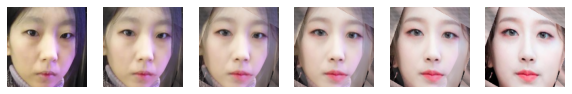

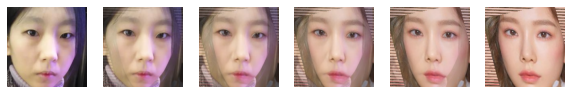

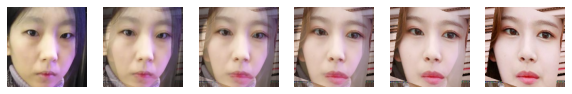

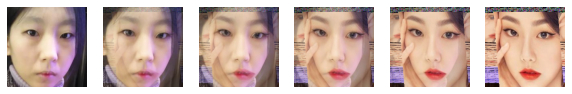

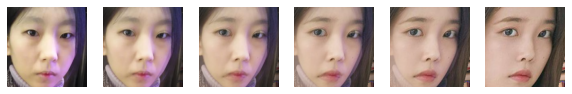

In [14]:
img_blending(sorted_faces)

# 결론

원하는 작업을 하는 함수를 짜는게 정말 힘들다는걸 깨달았다

지난 노드에서 특정 작업을 여러 사진에 반복하는 모양을 못 만든게 아쉬워서

이번에 지난번 함수를 응용해서 시각화를 도전해 보았다


## 아쉬운점

평면이었던 고양이 수염과는 달리 굴곡이 있는 사람의 얼굴은

어차피 투영변환으로 만질 수도 없을 것 같아서 코의 각도를 이용한 회전만 시켜보았다.

상위 5명의 이름을 가지고 처음부터 사진을 새로 따지 않는 이상 

이미 크롭되어 있는 사진을 활용하는 수 밖에 없었다.

어느정도 얼굴 크기가 비슷하고 코가 중심에 있는 형태로 크롭되었을 것이라 판단하고

약간 회전하는 것만으로 두장의 사진의 얼굴 비율을 맞출 수 있을 거라 기대했지만

아예 고개를 돌린 사람이나 얼굴 윤곽이 다르게 잡힌 것 자체는 극복이 불가능했다.

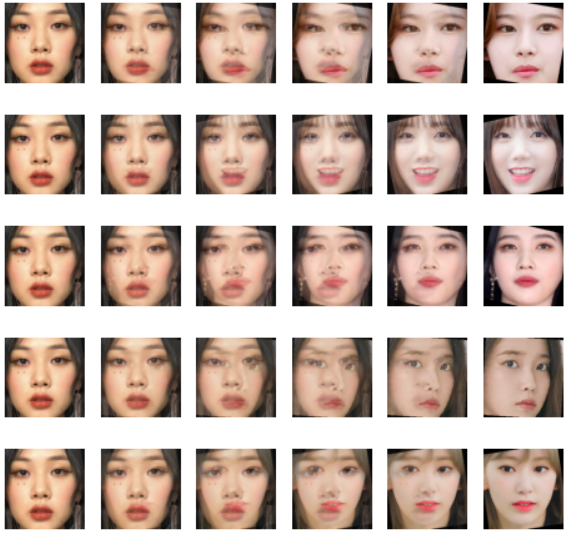

작업의 편의를 위해 정면을 바라보고 있는 사진을 기준사진으로 했는데

기울어진 기준 사진도 회전하는 과정을 넣고,

비교하는 사진과의 눈코입 위치를 맞출 수 있었다면 더 좋았을 것 같다.

다양한 시각화라서 여러가지를 해보고 싶었는데

사진을 절반씩 그라데이션으로 붙여본다거나 눈만 잘라서 바꿔본다거나 등등

한가지만 하는데도 너무 힘들었으므로 여기서 마무리

---

마무리를 하려고 했는데 본인 사진으로 바꾸는 김에 결국 함수에 손을 대서,

아핀변환을 이용해보았는데 생각보다 얼굴이 많이 찌그러졌다

가장 베스트는 회전 후 평행이동을 시키거나

아니면 애초부터 사진을 크롭할 때 얼굴 중심을 모두 일치시키거나 할 수 있다면

훨씬 깔끔한 형태가 나올 것 같다. 끝